<a href="https://colab.research.google.com/github/yunariver/newproject/blob/main/11_27_nnConv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

H, W = 100, 150
input_tensor = torch.randn(size=(1, H, W))

conv = nn.Conv2d(in_channels=1, out_channels=1,
                 kernel_size=3)
output_tensor = conv(input_tensor)
output_tensor.shape #torch.Size([1, 98, 148])

torch.Size([1, 98, 148])

In [ ]:
import torch
import torch.nn as nn
H, W = 100, 150
input_tensor = torch.randn(size = (1, H, W))
conv = nn.Conv2d(in_channels=1, out_channels=10,
                 kernel_size=3, padding =1, stride=2)
output_tensor = conv(input_tensor)
output_tensor.shape


torch.Size([10, 50, 75])

In [15]:
import torch
import torch.nn as nn


class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,
                    kernel_size=(5,5), padding=0)
    self.conv1_act = nn.ReLU()
    self.pool1 = nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16,
                      kernel_size=(5,5), padding=0)
    self.conv2_act = nn.ReLU()
    self.pool2 = nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120,
                      kernel_size=(5,5), padding=0)
    self.conv3_act = nn.ReLU()

    self.fc1 = nn.Linear(in_features=120, out_features=84)
    self.fc1_act = nn.ReLU()
    self.fc2 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):

    x = self.conv1_act(self.conv1(x))
    x = self.pool1(x)


    x = self.conv2_act(self.conv2(x))
    x = self.pool2(x)

    x = self.conv3_act(self.conv3(x))
    x = self.fc1_act(self.fc1(x))
    x = self.fc2(x)

    return x

loss_function = nn.CrossEntropyLoss()



In [16]:
import torch
H, W = 32, 32
imput_tensor = torch.randn(size=(1, H, W))
model = Model()

output_tensor = model(input_tensor)

RuntimeError: ignored

In [69]:
import torch
import torch.nn as nn

BATCH_SIZE = 4
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,
                    kernel_size=(5,5), padding=0)
    self.conv1_act = nn.ReLU()
    self.pool1 = nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16,
                      kernel_size=(5,5), padding=0)
    self.conv2_act = nn.ReLU()
    self.pool2 = nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120,
                      kernel_size=(4,4), padding=0)
    self.conv3_act = nn.ReLU()

    self.fc1 = nn.Linear(in_features=120, out_features=84)
    self.fc1_act = nn.ReLU()
    self.fc2 = nn.Linear(in_features=84, out_features=10)



  def forward(self, x):
    print('input : ', x.shape)
    print("self.conv1(x).shape:",self.conv1(x).shape)
    x = self.conv1_act(self.conv1(x))
    print("self.conv1_act.shape:" ,x.shape )
    x = self.pool1(x)
    print("poo1.shape:", x.shape)

    print(self.conv2(x).shape)
    x = self.conv2_act(self.conv2(x))
    print("conv2_ac.shape : ", x.shape)
    x = self.pool2(x)
    print("pool2.shape: ", x.shape)

    print("self.conv3(x).shape: ",self.conv3(x).shape)
    x = self.conv3_act(self.conv3(x))
    print("conv3_ac.shape: ", x.shape)

    x = x.view(BATCH_SIZE, -1)
    print("after flatten: ", x.shape)
    print("fc1",self.fc1(x).shape)
    x = self.fc1_act(self.fc1(x))
    print("fc1_act: ", x.shape)
    x = self.fc2(x)
    print("output shape : ", x.shape)

    return x

loss_function = nn.CrossEntropyLoss()



In [56]:
import torch
from torch.optim import SGD

EPOCHS = 10

if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEVICE = 'mps'
else : DEVICE = 'cpu'


H, W = 28, 28
B, C = 4, 1
input_tensor = torch.randn(size=(B, C, H, W))
model = Model()

output_tensor = model(input_tensor)

input :  torch.Size([4, 1, 28, 28])
self.conv1(x).shape: torch.Size([4, 6, 24, 24])
self.conv1_act.shape: torch.Size([4, 6, 24, 24])
poo1.shape: torch.Size([4, 6, 12, 12])
torch.Size([4, 16, 8, 8])
conv2_ac.shape :  torch.Size([4, 16, 8, 8])
pool2.shape:  torch.Size([4, 16, 4, 4])
self.conv3(x).shape:  torch.Size([4, 120, 1, 1])
conv3_ac.shape:  torch.Size([4, 120, 1, 1])
after flatten:  torch.Size([4, 120])
fc1 torch.Size([4, 84])
fc1_act:  torch.Size([4, 84])
output shape :  torch.Size([4, 10])


In [57]:
#$model
import torch
import torch.nn as nn

BATCH_SIZE = 4
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,
                    kernel_size=(5,5), padding=0)
    self.conv1_act = nn.ReLU()
    self.pool1 = nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16,
                      kernel_size=(5,5), padding=0)
    self.conv2_act = nn.ReLU()
    self.pool2 = nn.AvgPool2d(kernel_size=(2,2), stride=2)

    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120,
                      kernel_size=(4,4), padding=0)
    self.conv3_act = nn.ReLU()

    self.fc1 = nn.Linear(in_features=120, out_features=84)
    self.fc1_act = nn.ReLU()
    self.fc2 = nn.Linear(in_features=84, out_features=10)



  def forward(self, x):

    x = self.conv1_act(self.conv1(x))
    x = self.pool1(x)

    x = self.conv2_act(self.conv2(x))
    x = self.pool2(x)

    x = self.conv3_act(self.conv3(x))


    x = x.view(BATCH_SIZE, -1)

    x = self.fc1_act(self.fc1(x))
    x = self.fc2(x)


    return x




100%|██████████| 15000/15000 [01:12<00:00, 207.44it/s]


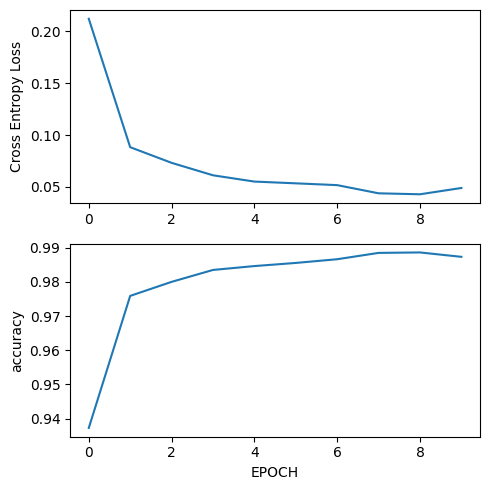

In [58]:
#dataset preparation
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.optim import SGD
import matplotlib.pyplot as plt
BATCH_SIZE = 4

dataset = MNIST(root='data', train=True, download=True,
                transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
n_samples = len(dataset)


#training setting
if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEIVCE = 'mps'
else : DEVICE = 'cpu'


LR = 0.1
model = Model().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

# 트레이닝
EPOCHS = 5
losses, accs = [], []
for epoch in range(EPOCHS):
  epoch_loss, n_corrects = 0., 0
  for X, y in tqdm(dataloader):
    X, y = X.to(DEVICE), y.to(DEVICE)

    pred = model(X)
    loss = loss_function(pred, y)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item() * len(X)

    n_corrects += (torch.max(pred, axis=1)[1] == y).sum().item()
    # n_corrects += (torch.max(pred, dim=1)[1] == y).sum().item()



  epoch_loss /= n_samples
  losses.append(epoch_loss)
  accs.append(n_corrects/n_samples)

fig, axes = plt.subplots(2,1,figsize=(5,5))
axes[0].plot(losses)
axes[1].plot(accs)
axes[0].set_ylabel("Cross Entropy Loss")
axes[1].set_ylabel("accuracy")
axes[1].set_xlabel("EPOCH")

fig.tight_layout()


## nn.Sequential

In [80]:
#$model
import torch
import torch.nn as nn

BATCH_SIZE = 4
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.feature_extract = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6,
                    kernel_size=(5,5), padding=0),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size=(2,2), stride=2),
        nn.Conv2d(in_channels=6, out_channels=16,
                      kernel_size=(5,5), padding=0),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size=(2,2), stride=2),

        nn.Conv2d(in_channels=16, out_channels=120,
                      kernel_size=(4,4), padding=0),
        nn.ReLU())
    self.classifier = nn.Sequential(
        nn.Linear(in_features=120, out_features=84),
        nn.ReLU() ,
        nn.Linear(in_features=84, out_features=10))




  def forward(self, x):

      x = self.feature_extract(x)
      x = x.view(x.shape[0], -1)
      x = self.classifier(x)


      return x





In [81]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


In [82]:
model = Model().to(DEVICE)
print(model)

Model(
  (feature_extract): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(4, 4), stride=(1, 1))
    (7): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [83]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [84]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.309301  [    0/60000]
loss: 0.837421  [ 6400/60000]
loss: 0.614026  [12800/60000]
loss: 0.845433  [19200/60000]
loss: 0.751613  [25600/60000]
loss: 0.701765  [32000/60000]
loss: 0.631659  [38400/60000]
loss: 0.569419  [44800/60000]
loss: 0.573619  [51200/60000]
loss: 0.659620  [57600/60000]
Test Error: 
 Accuracy: 78.0%, Avg loss: 0.563953 

Epoch 2
-------------------------------
loss: 0.484579  [    0/60000]
loss: 0.519071  [ 6400/60000]
loss: 0.358973  [12800/60000]
loss: 0.631913  [19200/60000]
loss: 0.555535  [25600/60000]
loss: 0.464148  [32000/60000]
loss: 0.491743  [38400/60000]
loss: 0.597906  [44800/60000]
loss: 0.542831  [51200/60000]
loss: 0.547128  [57600/60000]
Test Error: 
 Accuracy: 81.9%, Avg loss: 0.489052 

Epoch 3
-------------------------------
loss: 0.419659  [    0/60000]
loss: 0.426285  [ 6400/60000]
loss: 0.317515  [12800/60000]
loss: 0.537941  [19200/60000]
loss: 0.484624  [25600/60000]
loss: 0.417569  [32000/600

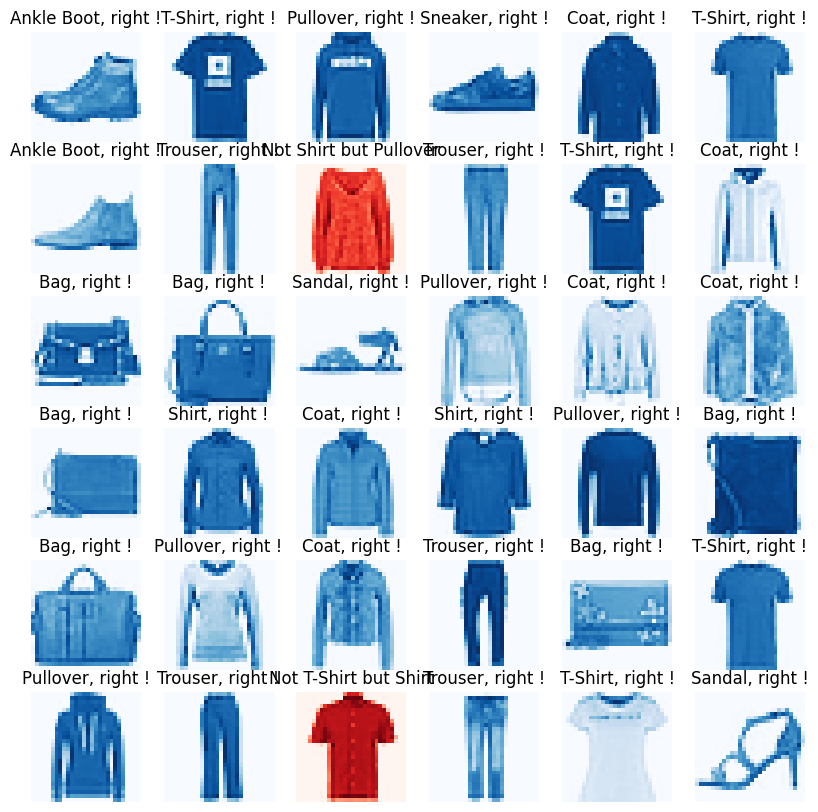

In [85]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(10,10))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].unsqueeze(dim=0)

    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    label = label_tags[test_data[data_idx][1]]

    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right !')
        cmap = 'Blues'
    else:
        plt.title('Not ' + pred + ' but ' +  label)
        cmap = 'Reds'
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')

plt.show()


In [ ]:
#$model
import torch
import torch.nn as nn

BATCH_SIZE = 4
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6,
                    kernel_size=(5,5), padding=0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=(2,2), stride=2))
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=6, out_channels=16,
                      kernel_size=(5,5), padding=0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=(2,2), stride=2))
    self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=120,
                      kernel_size=(4,4), padding=0),
        nn.Tanh())
    self.layer4 = nn.Sequential(
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh())
    self.layer5 = nn.Sequential(
        nn.Linear(in_features=84, out_features=10))




  def forward(self, x):



      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x)
      x = x.view(x.shape[0], -1)
      x = self.layer4(x)
      x = self.layer5(x)


      return x

In [120]:
class VGG11(nn.Module):
  def __init__(self):
    super(VGG11, self).__init__()

    self.features = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=64, out_channels=128,
                  kernel_size=3, padding=1 ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=128, out_channels=256,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels= 256,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=256, out_channels=512,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=512, out_channels=512,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=512, out_channels=512,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=512, out_channels=512,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #before x.view torch.Size([4, 512, 7, 7])

    )

    self.classifier = nn.Sequential(
        nn.Linear(in_features=512*7*7, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=1000))
  def forward(self, x):
    x = self.features(x)
    print("before flatten",x.shape)
    x = x.view(x.shape[0], -1)
    print("after flatten", x.shape)
    x = self.classifier(x)

    return x





In [121]:

import torch
from torch.optim import SGD


H, W = 224, 224
B, C = 4, 3
input_tensor = torch.randn(size=(B, C, H, W))
model = VGG11()

output_tensor = model(input_tensor)
print(output_tensor.shape)
print(output_tensor)

before flatten torch.Size([4, 512, 7, 7])
after flatten torch.Size([4, 25088])
torch.Size([4, 1000])
tensor([[-0.0070, -0.0069, -0.0075,  ...,  0.0104, -0.0127,  0.0143],
        [-0.0071, -0.0069, -0.0075,  ...,  0.0103, -0.0127,  0.0143],
        [-0.0071, -0.0069, -0.0074,  ...,  0.0104, -0.0127,  0.0143],
        [-0.0070, -0.0069, -0.0074,  ...,  0.0103, -0.0127,  0.0143]],
       grad_fn=<AddmmBackward0>)


In [116]:
#dataset preparation
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.optim import SGD
import matplotlib.pyplot as plt
BATCH_SIZE = 4

dataset = MNIST(root='data', train=True, download=True,
                transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
n_samples = len(dataset)




#training setting
if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEIVCE = 'mps'
else : DEVICE = 'cpu'





LR = 0.1
model = VGG11().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)



EPOCHS = 3
losses, accs = [], []
for epoch in range(EPOCHS):
  epoch_loss, n_corrects = 0., 0
  for X, y in tqdm(dataloader):
    X, y = X.to(DEVICE), y.to(DEVICE)

    pred = model(X)
    loss = loss_function(pred, y)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item() * len(X)

    n_corrects += (torch.max(pred, axis=1)[1] == y).sum().item()
    # n_corrects += (torch.max(pred, dim=1)[1] == y).sum().item()



  epoch_loss /= n_samples
  losses.append(epoch_loss)
  accs.append(n_corrects/n_samples)

fig, axes = plt.subplots(2,1,figsize=(5,5))
axes[0].plot(losses)
axes[1].plot(accs)
axes[0].set_ylabel("Cross Entropy Loss")
axes[1].set_ylabel("accuracy")
axes[1].set_xlabel("EPOCH")

fig.tight_layout()


## nn.Sequential

  0%|          | 0/15000 [00:00<?, ?it/s]


RuntimeError: ignored